# **Gonzalez de Sanitago José Manuel**

*Nota: Hasta abajo viene la solucion analitica*

# Ejemplo: Flecha y cojinete

Una flecha será embonada en un cojinete como se muestra a continuación

<img src="https://github.com/Medetl/Simulacion/blob/main/Unidad%20II/cojinete.png?raw=1">

Si $x_1$ sigue una distribución normal con media $1.5$ y varianza $0.0016$, y $x_2$ esta misma distribución con media $1.48$ y varianza $0.0009$, determine:

a) La probabilidad de que haya interferencia.

b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de $0.01$, con un nivel de seguridad del $95\%.$

Vamos a resolver este problema, procurando seguir la metodología vista en el curso.

### 1. Identifique las variables

Tenemos dos: $x_1$ y $x_2$.

### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias

En el planteamiento ya se especifica que $x_1 \sim N(1.5, 0.04)$ y que $x_1 \sim N(1.48, 0.03)$.

### 4. Defina el modelo del sistema y los objetivos de la simulación

La diferencia $x_1 - x_2$ modela adecuadamente el sistema.

Si $x_2 - x_1 > 0$ el diametro de la flecha es más grande que el espacio en el cojinte y, por tanto, hay interferencia. De lo contrario, las piezas embonan sin problema.

Objetivo: determinar la frecuencia con que esto ocurre, lo cual nos da una esrimación de la probabilidad de interefrencia.

Una forma de implementarlo es mediante el siguiente código.

In [65]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [66]:
def interferencia():                #Esta función devuelve el valor 1 si hay interferencia o 0 si no la hay.
    interf=0
    x_1 = random.gauss(1.50,0.04)    #La funcion gauss genera un número que sigue una distribucion normal con
    x_2 = random.gauss(1.48,0.03)   # la media y la desvicion estandar especificados.
    if 0.0 < x_2 - x_1:
        interf += 1
    return interf

In [67]:
interferencia()

0

### 5. Diseñe el experimento

Para estimar la probabilidad de interferencia, ejecutamos $n$ veces la función anterior y calculamos de manera acumulativa
la probabilidad de interferencia.

In [71]:
def prob_inter(n):
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    inter = 0                       # estimada al contar las veces que hay interferencia y dividir entre las veces que
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        inter += interferencia()
        prob.append(inter/(i+1))
    return prob

In [72]:
X = prob_inter(3000)                # Asignamos valores a n y realizamos el experimento

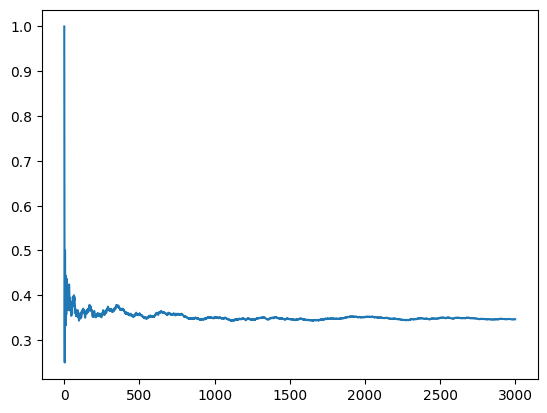

In [73]:
plt.plot(X)                         # La gráfica muestra que la convergencia está garantizada con 500 iteraciones
                                    # Sin embargo, diferentes ejecuciones darán resultados distintos

In [74]:
print(np.mean(X), np.std(X))

0.3519745537260378 0.015256880732234421


### 6. Repita el experimento $n$ veces

Una forma de hacerlo es mediante el siguiente codigo.

In [75]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = prob_inter(500)
        lista.append(np.mean(s))
    return lista

In [76]:
Y=modelo(500)

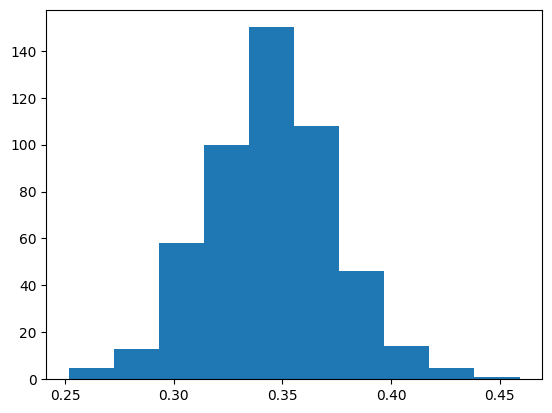

In [77]:
plt.hist(Y)
plt.show()

In [78]:
print(np.mean(Y), np.std(Y))

0.34503325077549174 0.029367814501668792


### Paso 7. Hallamos el intervalo de confianza.

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

In [79]:
np.mean(Y)

0.34503325077549174

In [80]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)

(0.33689290790865034, 0.35317359364233314)

### Para determinar el número de simulaciones

$$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

In [81]:
N = (2*np.std(X)*1.96/0.01)**2

In [82]:
print(N)

35.76873956070271


### Podemos comparar con la solución analítica del problema.

Para ello usamos la teoría sobre la suma de variables con distribución normal.

Como tenemos que $X_1\sim N(1.5, 0.04)$ y $X_2\sim N(1.48,0.03)$ siguen una distribucion normal

Entonces hacemos uso del teorema de suma de dos distribuciones normales que es lo siguiente

Sea $X_1$ y $X_2$ dos distribuciones normales tenemos que $D = X_1 - X_2$ y
$X_1\sim N(\mu_{x_1},\sigma_{x_1}^2)- X_2\sim N(\mu_{x_2},\sigma_{x_2}^2)=D\sim (\mu_{x_1}-\mu_{x_2},\sigma_{x_1}^2-\sigma_{x_2}^2)$

$\mu_{x_1}-\mu_{x_2}=1.5-1.48=0.02$

$\sigma_{x_1}^2-\sigma_{x_2}^2 = \sqrt{(0.04)^2+(0.03)^2}=0.05$

Entonces tenemos lo siguiente:

$D\sim(0.02,0.05)$

Y Ahora necesitamos calcular la probabilidad de que D sea mayor o igual a cero $P(D\geq 0)$


Debido a que la normal es simetrica puede simplificarse mediante la diguiente transformación:Sea z una variable aleatoria definida por la siguiente relacion:

$z=(X-\mu)/\sigma$

En donde $\sigma$ y $\mu$ son la media y desviación de X, respectivamente. De acuerdo con lo anterior , Z es una variable aleatoria estandarizada c0on media cero y desviación estándar uno.

Por lo anterios tenemos lo siguiente:

$z=\frac{0-0.02}{.05}=-0.04$

y Esto nos da

$P(D\geq0)=P(Z\geq -0.04)$

y esto se puede resolver con la siguiente integral $P(Z\geq-0.04)=\frac{1}{\sqrt{2\pi}\sigma}\int_{-\infty}^{z}e^{-\frac{z^2}{2}}dz $

$F_z=(-0.04;0,1)=0.34457$

Esto fue calculado mediante software (Symbolab) pero tambien puede consultarse en las tablas de distribución acumulativa normal estandar (En este caso fue el "Canavos, G. (1988). Probabilidad y Estadistica Aplicaciones y Métodos (Apendice: Tabla D. McGraw-Hill)

$P(X\geq x)=P(Z\geq -0.04)= 1 - F_z=(-0.04;0,1)=0.65543$

Calculo del intervalo de confianza

Utilizando la formula que esta más arriba se puede concluir la siguiente formula $\overline{x}\pm z_{1-\alpha/2}\cdot \frac{\sigma}{\sqrt{n}}$

Y esto solo puede resolverse a partir de los datos de la muestra de tamaño n

$.3450+1.96\cdot \frac{.2936}{\sqrt{3000}}=0.3555$

$.3450-1.96\cdot \frac{.2936}{\sqrt{3000}}=0.3344$

y el intervalo de confianza queda queda $(0.3344,0.3555)$

Para el calculo de n

tenemos la siguiente ecuacion al reescribirse la ecuacion del intervalo de confianza $$-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \bar{X}-\mu < z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}=1-\alpha$$

y da como resultado
$P(|\bar{X}-\mu)|<\epsilon=1-\alpha$ en donde $\epsilon=Z_{1-\alpha/2}\frac{\sigma}{\sqrt{n}}$ y resolviendo para n tenemos

$n=(\frac{Z_{1-\alpha/2} \sigma}{\epsilon})^2$

y usando los datos de la simulacion $n=(\frac{1.96\cdot 0.2936}{0.01})^2=33.1149$

In [60]:
norm.cdf(-0.04, -0.02, 0.05)

0.3445782583896758

In [62]:
norm.cdf(-0.04, -0.02, 0.05)-np.mean(Y)

0.0007545179873758023